In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('GDP_dataset.csv')
df.head()

,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,Industry,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total economy,Dollars,81,millions,6,v1001805537,1.1.1,1867032.1,NaN,NaN,NaN,1
1,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total tourism activities,Dollars,81,millions,6,v1001805538,1.1.2,35211.0,NaN,NaN,NaN,1
2,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total tourism industries,Dollars,81,millions,6,v1001805539,1.1.3,26357.9,NaN,NaN,NaN,1
3,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total transportation,Dollars,81,millions,6,v1001805540,1.1.4,8221.6,NaN,NaN,NaN,1
4,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Air transportation,Dollars,81,millions,6,v1001805541,1.1.5,5462.2,NaN,NaN,NaN,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   REF_DATE                                           7182 non-null   int64  
 1   GEO                                                7182 non-null   object 
 2   DGUID                                              7182 non-null   object 
 3   Gross domestic product (GDP) and related measures  7182 non-null   object 
 4   Industry                                           7182 non-null   object 
 5   UOM                                                7182 non-null   object 
 6   UOM_ID                                             7182 non-null   int64  
 7   SCALAR_FACTOR                                      7182 non-null   object 
 8   SCALAR_ID                                          7182 non-null   int64  
 9   VECTOR  

In [4]:
df['STATUS'].unique()

array([nan, '..'], dtype=object)

In [5]:
df = df.drop(columns = ['STATUS', 'SYMBOL','TERMINATED'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   REF_DATE                                           7182 non-null   int64  
 1   GEO                                                7182 non-null   object 
 2   DGUID                                              7182 non-null   object 
 3   Gross domestic product (GDP) and related measures  7182 non-null   object 
 4   Industry                                           7182 non-null   object 
 5   UOM                                                7182 non-null   object 
 6   UOM_ID                                             7182 non-null   int64  
 7   SCALAR_FACTOR                                      7182 non-null   object 
 8   SCALAR_ID                                          7182 non-null   int64  
 9   VECTOR  

In [7]:
df['Gross domestic product (GDP) and related measures'].unique()

array(['Gross domestic product (GDP) at basic prices', 'Labour income',
       'Gross mixed income', 'Other operating surplus', 'Number of jobs',
       'Labour compensation per job',
       'Gross domestic product (GDP) per job',
       'Tourism gross domestic product (GDP) ratio',
       'Tourism employment ratio'], dtype=object)

In [8]:
df['Industry'].unique()

array(['Total economy', 'Total tourism activities',
       'Total tourism industries', 'Total transportation',
       'Air transportation', 'Railway transportation',
       'Water transportation', 'Bus transportation', 'Taxis',
       'Vehicle rental', 'Total accommodation', 'Hotels', 'Motels',
       'Camping', 'Other accommodation', 'Food and beverage services',
       'Recreation and entertainment', 'Travel services',
       'Other industries'], dtype=object)

In [9]:
df['VALUE'].fillna(0,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   REF_DATE                                           7182 non-null   int64  
 1   GEO                                                7182 non-null   object 
 2   DGUID                                              7182 non-null   object 
 3   Gross domestic product (GDP) and related measures  7182 non-null   object 
 4   Industry                                           7182 non-null   object 
 5   UOM                                                7182 non-null   object 
 6   UOM_ID                                             7182 non-null   int64  
 7   SCALAR_FACTOR                                      7182 non-null   object 
 8   SCALAR_ID                                          7182 non-null   int64  
 9   VECTOR  

In [11]:
df['Total_economy'] = df.loc[df['Industry'] == 'Total economy']['VALUE']
df.head()

,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,Industry,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_economy
0,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total economy,Dollars,81,millions,6,v1001805537,1.1.1,1867032.1,1,1867032.1
1,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total tourism activities,Dollars,81,millions,6,v1001805538,1.1.2,35211.0,1,NaN
2,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total tourism industries,Dollars,81,millions,6,v1001805539,1.1.3,26357.9,1,NaN
3,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total transportation,Dollars,81,millions,6,v1001805540,1.1.4,8221.6,1,NaN
4,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Air transportation,Dollars,81,millions,6,v1001805541,1.1.5,5462.2,1,NaN


In [12]:
df['Industry'].unique()

array(['Total economy', 'Total tourism activities',
       'Total tourism industries', 'Total transportation',
       'Air transportation', 'Railway transportation',
       'Water transportation', 'Bus transportation', 'Taxis',
       'Vehicle rental', 'Total accommodation', 'Hotels', 'Motels',
       'Camping', 'Other accommodation', 'Food and beverage services',
       'Recreation and entertainment', 'Travel services',
       'Other industries'], dtype=object)

In [13]:
df['Total tourism activities'] = df.loc[df['Industry'] == 'Total tourism activities']['VALUE']
df['Total tourism industries'] = df.loc[df['Industry'] == 'Total tourism industries']['VALUE']
df['Total transportation'] = df.loc[df['Industry'] == 'Total transportation']['VALUE']
df['Air transportation'] = df.loc[df['Industry'] == 'Air transportation']['VALUE']
df['Railway transportation'] = df.loc[df['Industry'] == 'Railway transportation']['VALUE']
df['Water transportation'] = df.loc[df['Industry'] == 'Water transportation']['VALUE']
df['Bus transportation'] = df.loc[df['Industry'] == 'Bus transportation']['VALUE']
df['Taxis'] = df.loc[df['Industry'] == 'Taxis']['VALUE']
df['Vehicle rental'] = df.loc[df['Industry'] == 'Vehicle rental']['VALUE']
df['Total accommodation'] = df.loc[df['Industry'] == 'Total accommodation']['VALUE']
df['Hotels'] = df.loc[df['Industry'] == 'Hotels']['VALUE']
df['Motels'] = df.loc[df['Industry'] == 'Motels']['VALUE']
df['Camping'] = df.loc[df['Industry'] == 'Camping']['VALUE']
df['Other accommodation'] = df.loc[df['Industry'] == 'Other accommodation']['VALUE']
df['Food and beverage services'] = df.loc[df['Industry'] == 'Food and beverage services']['VALUE']
df['Recreation and entertainment'] = df.loc[df['Industry'] == 'Recreation and entertainment']['VALUE']
df['Travel services'] = df.loc[df['Industry'] == 'Travel services']['VALUE']
df['Other industries'] = df.loc[df['Industry'] == 'Other industries']['VALUE']
df.head()

,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,Industry,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_economy,Total tourism activities,Total tourism industries,Total transportation,Air transportation,Railway transportation,Water transportation,Bus transportation,Taxis,Vehicle rental,Total accommodation,Hotels,Motels,Camping,Other accommodation,Food and beverage services,Recreation and entertainment,Travel services,Other industries
0,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total economy,Dollars,81,millions,6,v1001805537,1.1.1,1867032.1,1,1867032.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total tourism activities,Dollars,81,millions,6,v1001805538,1.1.2,35211.0,1,NaN,35211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total tourism industries,Dollars,81,millions,6,v1001805539,1.1.3,26357.9,1,NaN,NaN,26357.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Total transportation,Dollars,81,millions,6,v1001805540,1.1.4,8221.6,1,NaN,NaN,NaN,8221.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Air transportation,Dollars,81,millions,6,v1001805541,1.1.5,5462.2,1,NaN,NaN,NaN,NaN,5462.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df = df.drop(columns = ['Industry','VALUE'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   REF_DATE                                           7182 non-null   int64  
 1   GEO                                                7182 non-null   object 
 2   DGUID                                              7182 non-null   object 
 3   Gross domestic product (GDP) and related measures  7182 non-null   object 
 4   UOM                                                7182 non-null   object 
 5   UOM_ID                                             7182 non-null   int64  
 6   SCALAR_FACTOR                                      7182 non-null   object 
 7   SCALAR_ID                                          7182 non-null   int64  
 8   VECTOR                                             7182 non-null   object 
 9   COORDINA

In [15]:
df['Total tourism activities'] = df['Total tourism activities'].shift(-1)
df.head()

,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_economy,Total tourism activities,Total tourism industries,Total transportation,Air transportation,Railway transportation,Water transportation,Bus transportation,Taxis,Vehicle rental,Total accommodation,Hotels,Motels,Camping,Other accommodation,Food and beverage services,Recreation and entertainment,Travel services,Other industries
0,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805537,1.1.1,1,1867032.1,35211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805538,1.1.2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805539,1.1.3,1,NaN,NaN,26357.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805540,1.1.4,1,NaN,NaN,NaN,8221.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805541,1.1.5,1,NaN,NaN,NaN,NaN,5462.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   REF_DATE                                           7182 non-null   int64  
 1   GEO                                                7182 non-null   object 
 2   DGUID                                              7182 non-null   object 
 3   Gross domestic product (GDP) and related measures  7182 non-null   object 
 4   UOM                                                7182 non-null   object 
 5   UOM_ID                                             7182 non-null   int64  
 6   SCALAR_FACTOR                                      7182 non-null   object 
 7   SCALAR_ID                                          7182 non-null   int64  
 8   VECTOR                                             7182 non-null   object 
 9   COORDINA

In [17]:
df.iloc[:,13] = df.iloc[:,13].shift(-2)
df.head()


,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_economy,Total tourism activities,Total tourism industries,Total transportation,Air transportation,Railway transportation,Water transportation,Bus transportation,Taxis,Vehicle rental,Total accommodation,Hotels,Motels,Camping,Other accommodation,Food and beverage services,Recreation and entertainment,Travel services,Other industries
0,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805537,1.1.1,1,1867032.1,35211.0,26357.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805538,1.1.2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805539,1.1.3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805540,1.1.4,1,NaN,NaN,NaN,8221.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805541,1.1.5,1,NaN,NaN,NaN,NaN,5462.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
for i in range(3,19):
    df.iloc[:,i+11] = df.iloc[:,i+11].shift(-i)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7182 entries, 0 to 7181
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   REF_DATE                                           7182 non-null   int64  
 1   GEO                                                7182 non-null   object 
 2   DGUID                                              7182 non-null   object 
 3   Gross domestic product (GDP) and related measures  7182 non-null   object 
 4   UOM                                                7182 non-null   object 
 5   UOM_ID                                             7182 non-null   int64  
 6   SCALAR_FACTOR                                      7182 non-null   object 
 7   SCALAR_ID                                          7182 non-null   int64  
 8   VECTOR                                             7182 non-null   object 
 9   COORDINA

In [20]:
df.tail(19)

,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_economy,Total tourism activities,Total tourism industries,Total transportation,Air transportation,Railway transportation,Water transportation,Bus transportation,Taxis,Vehicle rental,Total accommodation,Hotels,Motels,Camping,Other accommodation,Food and beverage services,Recreation and entertainment,Travel services,Other industries
7163,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807910,14.9.1,1,0.0,0.0,28.6,35.1,37.0,0.0,0.4,0.0,16.3,25.0,59.7,68.4,36.1,39.9,64.9,46.1,81.5,83.5,0.8
7164,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807911,14.9.2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7165,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807912,14.9.3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7166,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807913,14.9.4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7167,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807914,14.9.5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7168,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807915,14.9.6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7169,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807916,14.9.7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7170,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807917,14.9.8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7171,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807918,14.9.9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7172,2019,Nunavut,2016A000262,Tourism employment ratio,Percentage,242,units,0,v1001807919,14.9.10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 0 to 7163
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   REF_DATE                                           378 non-null    int64  
 1   GEO                                                378 non-null    object 
 2   DGUID                                              378 non-null    object 
 3   Gross domestic product (GDP) and related measures  378 non-null    object 
 4   UOM                                                378 non-null    object 
 5   UOM_ID                                             378 non-null    int64  
 6   SCALAR_FACTOR                                      378 non-null    object 
 7   SCALAR_ID                                          378 non-null    int64  
 8   VECTOR                                             378 non-null    object 
 9   COORDINATE    

In [24]:
df.head()

,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_economy,Total tourism activities,Total tourism industries,Total transportation,Air transportation,Railway transportation,Water transportation,Bus transportation,Taxis,Vehicle rental,Total accommodation,Hotels,Motels,Camping,Other accommodation,Food and beverage services,Recreation and entertainment,Travel services,Other industries
0,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805537,1.1.1,1,1867032.1,35211.0,26357.9,8221.6,5462.2,1535.9,93.5,378.2,189.5,562.3,7455.7,5355.6,439.9,759.2,901.0,5553.4,2705.5,2421.6,8853.1
19,2014,Canada,2016A000011124,Labour income,Dollars,81,millions,6,v1001805556,1.2.1,1,997815.0,22350.7,16861.4,4175.4,3315.5,315.0,58.3,267.1,59.7,159.8,4446.6,3253.9,265.8,401.7,525.2,4600.9,1762.4,1876.1,5489.3
38,2014,Canada,2016A000011124,Gross mixed income,Dollars,81,millions,6,v1001805575,1.3.1,1,227170.4,1264.5,920.4,114.9,0.0,0.0,0.3,10.8,98.8,5.0,167.6,92.0,7.9,44.2,23.5,107.8,233.0,297.1,344.1
57,2014,Canada,2016A000011124,Other operating surplus,Dollars,81,millions,6,v1001805594,1.4.1,1,642046.8,11595.8,8576.1,3931.4,2146.8,1220.8,34.8,100.3,31.1,397.6,2841.4,2009.7,166.2,313.3,352.2,844.7,710.1,248.4,3019.7
76,2014,Canada,2016A000011124,Number of jobs,Jobs,190,thousands,3,v1001805613,1.5.1,1,18083.1,634.1,509.0,66.3,43.5,3.3,0.8,7.5,8.2,3.0,124.6,93.1,7.7,9.0,14.8,204.2,70.5,43.5,125.1


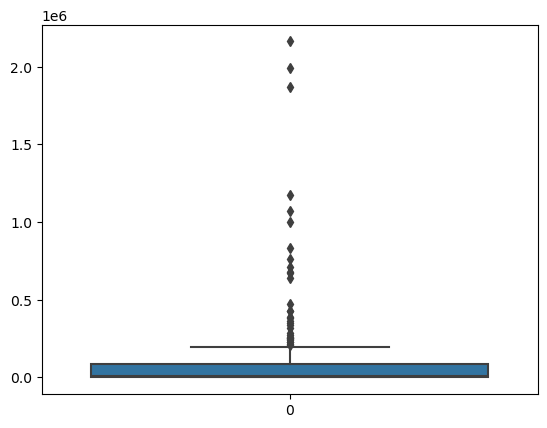

In [25]:
sns.boxplot(df.Total_economy)
plt.show()

In [26]:
df.Total_economy.sort_values().tail(15)

5643     425276.7
3439     427629.1
5833     473851.7
57       642046.8
2451     668936.5
1026     676838.4
4845     711227.6
3420     764464.8
5814     833628.8
19       997815.0
2413    1069280.9
4807    1174047.0
0       1867032.1
2394    1990785.5
4788    2161113.3
Name: Total_economy, dtype: float64

In [27]:
df[df.Total_economy > 1000000.0]

,REF_DATE,GEO,DGUID,Gross domestic product (GDP) and related measures,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_economy,Total tourism activities,Total tourism industries,Total transportation,Air transportation,Railway transportation,Water transportation,Bus transportation,Taxis,Vehicle rental,Total accommodation,Hotels,Motels,Camping,Other accommodation,Food and beverage services,Recreation and entertainment,Travel services,Other industries
0,2014,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805537,1.1.1,1,1867032.1,35211.0,26357.9,8221.6,5462.2,1535.9,93.5,378.2,189.5,562.3,7455.7,5355.6,439.9,759.2,901.0,5553.4,2705.5,2421.6,8853.1
2394,2017,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805537,1.1.1,1,1990785.5,41398.0,32006.5,11009.8,7787.1,1595.8,192.1,475.4,199.1,760.3,8925.8,6479.6,411.3,837.5,1197.4,6663.9,2780.4,2626.6,9391.5
2413,2017,Canada,2016A000011124,Labour income,Dollars,81,millions,6,v1001805556,1.2.1,1,1069280.9,24904.3,19189.2,5027.8,3958.6,316.1,136.7,329.5,53.7,233.2,4955.3,3693.8,232.9,370.7,657.9,5497.7,1800.4,1907.9,5715.1
4788,2019,Canada,2016A000011124,Gross domestic product (GDP) at basic prices,Dollars,81,millions,6,v1001805537,1.1.1,1,2161113.3,43555.6,33906.2,11018.4,8627.7,431.1,188.6,561.3,290.6,919.1,10085.0,6287.5,391.3,824.6,2581.6,6613.4,3396.4,2793.0,9649.4
4807,2019,Canada,2016A000011124,Labour income,Dollars,81,millions,6,v1001805556,1.2.1,1,1174047.0,27191.4,21108.0,5901.3,4637.8,363.2,155.3,403.8,62.5,278.7,5505.7,3484.8,214.9,392.3,1413.7,5554.2,2207.0,1939.8,6083.4


In [28]:
df.to_csv('cleaned_GDP.csv', index=None)